In [33]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

x = load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target

print(cancer.head())
print(cancer.target.value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [35]:
cancer.shape

(569, 31)

In [24]:
#Decision Tree 학습

from sklearn import tree
from sklearn.model_selection import train_test_split

X = cancer.iloc[:,:-1]
y = cancer.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

clf = tree.DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [25]:
import sklearn.metrics as mt

print('Train_Accuracy: ', clf.score(X_train, y_train))
print('Test_Accuracy: ', clf.score(X_test, y_test))

Train_Accuracy:  1.0
Test_Accuracy:  0.9298245614035088


In [26]:
#교차검증
from sklearn.model_selection import cross_val_score

#각 폴드의 스코어
scores = cross_val_score(clf, X, y, cv = 5)
print(scores)
print('교차검증 평균: ', scores.mean())

[0.9122807  0.9122807  0.90350877 0.92982456 0.91150442]
교차검증 평균:  0.9138798323241734


In [27]:
#그리드서치

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[3, 5, 7], 'min_samples_split':[3, 5]}
print(parameters)

gridcv = GridSearchCV(clf, param_grid = parameters, cv = 5, refit = True)

gridcv.fit(X_train, y_train)

scores_df = pd.DataFrame(gridcv.cv_results_['params'])
scores_df['mean_test_score'] = gridcv.cv_results_['mean_test_score']
scores_df.sort_values(by = 'mean_test_score', ascending = False)

{'max_depth': [3, 5, 7], 'min_samples_split': [3, 5]}


,max_depth,min_samples_split,mean_test_score
3,5,5,0.924684
0,3,3,0.924652
1,3,5,0.924652
2,5,3,0.922152
4,7,3,0.919589
5,7,5,0.914684


In [28]:
best_clf = gridcv.best_estimator_
best_clf.fit(X_train, y_train)
score = best_clf.score(X_test, y_test)
print(score)

0.9532163742690059


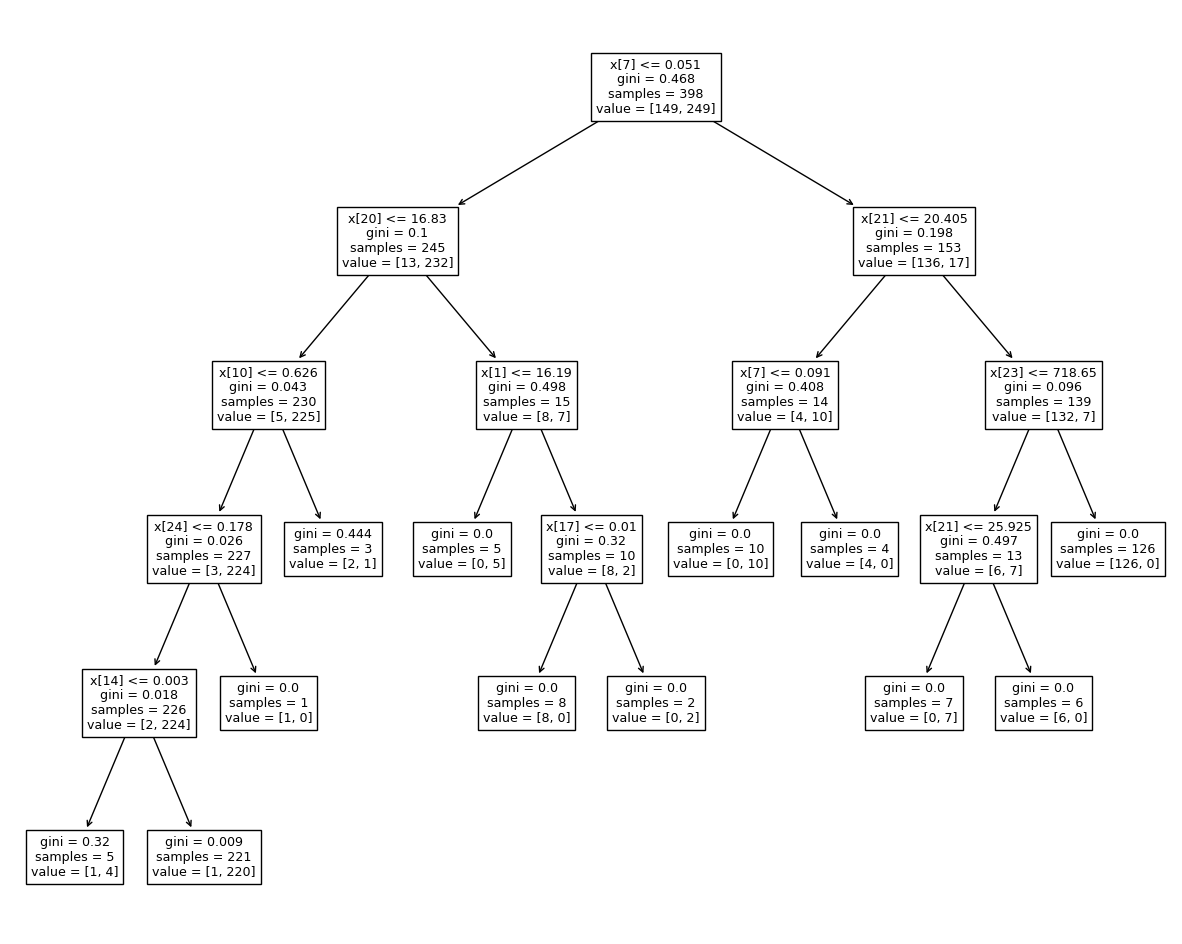

In [29]:
#시각화

import matplotlib.pyplot as plt

plt.figure(figsize = (15, 12))
tree.plot_tree(best_clf)
plt.show()